#### Written by Gaurav Bhardwaj
#### NYU CUSP PUI
#### Assignment 1 Homework 3
#### This is a skeleton & instruction notebook
#### GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), ### all with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice.
#### For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).
#### Describe the behavior you see in the plots in terms of the law of large numbers.
#### PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing ### Extra Credit: FIT a gaussian to the distribution of means

In [73]:
from __future__ import print_function
__author__= 'gb1877'

import numpy as np
import pylab as pl

# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### choose which distributions to use

In [30]:
#distributions = ['poisson', 'normal', 'chisq', 'exp', 'binomial']
distributions = ['chisq']

In [31]:
mymean = 100
df = mymean
md = {}
# md is an empty dictionary

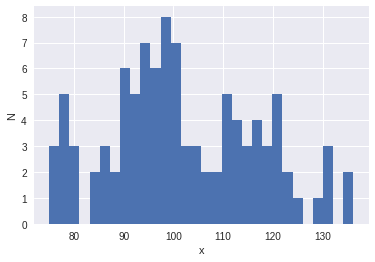

In [32]:

md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [33]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))
np.array(range(1, 100))
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

Chisq mean: 101.97, standard deviation: 14.84
[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


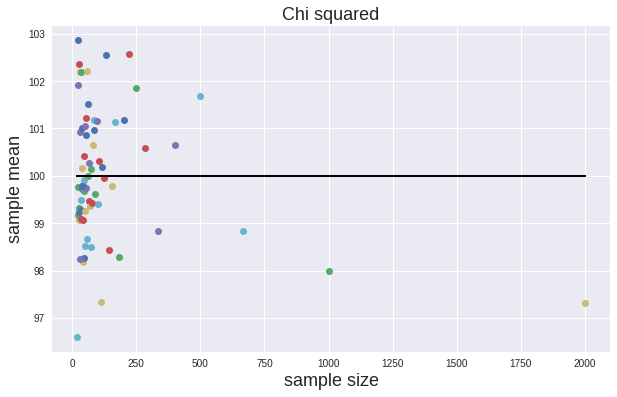

In [34]:

# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = 100)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

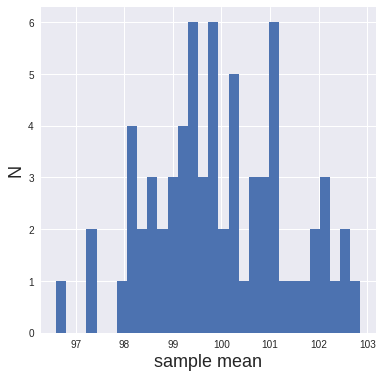

In [35]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(6,6))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Do it for the Normal distribution

In [36]:
md['normal']= np.random.normal(df,5,size=100)

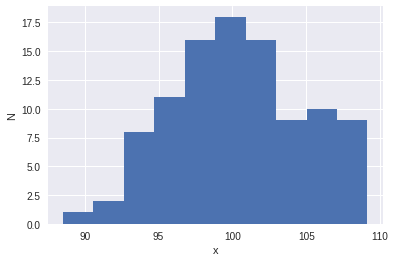

In [37]:
pl.hist(md['normal'])
pl.ylabel('N')
pl.xlabel('x')

In [38]:
print ("Normal distribution mean: %.2f, standard deviation: %.2f"%(mean(md['normal']), md['normal'].std()))
mysize = (8000 / (np.array(range(1, 100)))).astype(int)

Normal distribution mean: 100.35, standard deviation: 4.50


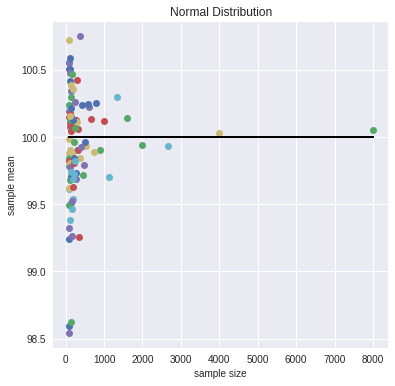

In [39]:
md['normal'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['normal'][n] = np.random.normal(df,5, size = n)
    
# save the means for plotting later    

md['normal']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(6,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['normal']['means'][nn],'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=10)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=10)
        axchisq_mu_n.set_title('Normal Distribution', fontsize=12)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

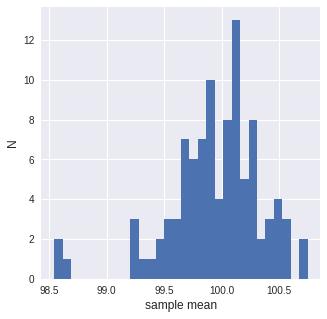

In [40]:

allmeans = list(md['normal']['means'].values())

pl.figure(figsize=(5, 5))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 12)
pl.ylabel('N', fontsize = 12)

## Do it for the Poisson distribution

Poisson mean: 99.91, standard deviation: 9.85


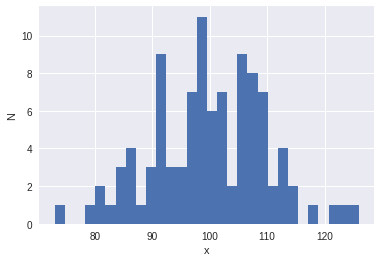

In [41]:
import numpy as np

md['poisson'] = np.random.poisson(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['poisson'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['poisson'].mean(), md['poisson'].std()))

mysize = (6000 / (np.array(range(1, 100)))).astype(int)

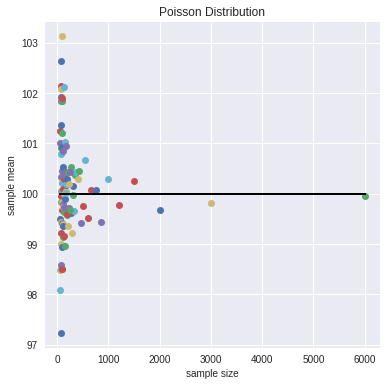

In [42]:
md['poisson'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['poisson'][n] = np.random.poisson(df, size = n)
    
# save the means for plotting later    

md['poisson']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(6,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=10)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=10)
        axchisq_mu_n.set_title('Poisson Distribution', fontsize=12)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

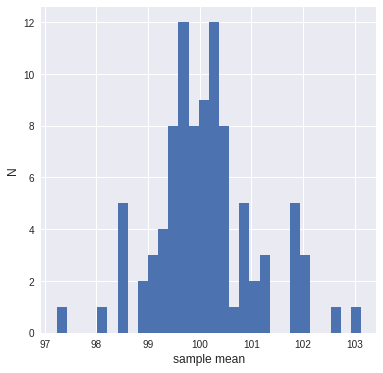

In [43]:
allmeans = list(md['poisson']['means'].values())

pl.figure(figsize=(6, 6))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 12)
pl.ylabel('N', fontsize = 12)


## Do it for the Binomial distribution

Binomial mean: 39.66, standard deviation: 6.44
[4000 2000 1333 1000  800  666  571  500  444  400  363  333  307  285  266
  250  235  222  210  200  190  181  173  166  160  153  148  142  137  133
  129  125  121  117  114  111  108  105  102  100   97   95   93   90   88
   86   85   83   81   80   78   76   75   74   72   71   70   68   67   66
   65   64   63   62   61   60   59   58   57   57   56   55   54   54   53
   52   51   51   50   50   49   48   48   47   47   46   45   45   44   44
   43   43   43   42   42   41   41   40   40]


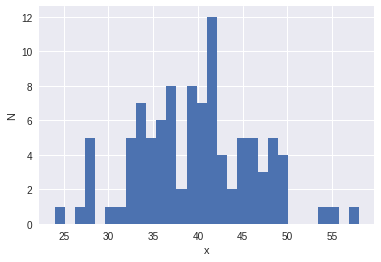

In [44]:
import numpy as np

num=200                                                                         ##n is the number of events
md['binomial'] = np.random.binomial(num,0.2, size=100)                          ##Probability is taken as 0.2
# md now is a dictionary with one object: an array by the key 'binomial'
pl.hist(md['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

mysize = (4000 / (np.array(range(1, 100)))).astype(int)
print(mysize)

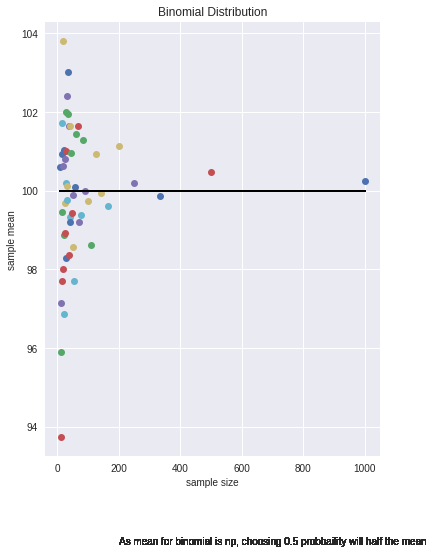

In [55]:
md['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable
num=500                                                                        ##num is the number of events
for n in mysize:
    md['binomial'][n] = np.random.binomial(num,0.2, size = n)                   ##Probability is taken as 0.5
    
# save the means for plotting later    

md['binomial']['means'] = {}
axbi_mu_n = pl.figure(figsize=(6,8)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbi_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbi_mu_n.set_xlabel('sample size', fontsize=10)
        axbi_mu_n.set_ylabel('sample mean', fontsize=10)
        axbi_mu_n.set_title('Binomial Distribution', fontsize=12)
        axbi_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
        axbi_mu_n.text(200,91,'As mean for binomial is np, choosing 0.5 probbaility will half the mean')

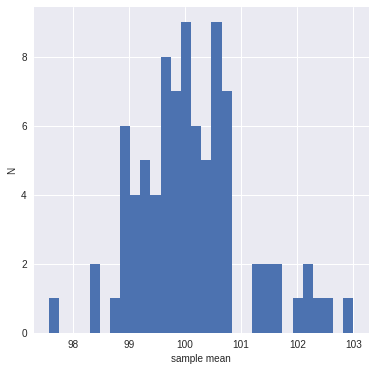

In [46]:
allmeans = list(md['binomial']['means'].values())

pl.figure(figsize=(6, 6))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 10)
pl.ylabel('N', fontsize = 10)

## Do it for Exponential Distribution

Exponential mean: 97.99, standard deviation: 87.08
[1000  500  333  250  200  166  142  125  111  100   90   83   76   71   66
   62   58   55   52   50   47   45   43   41   40   38   37   35   34   33
   32   31   30   29   28   27   27   26   25   25   24   23   23   22   22
   21   21   20   20   20   19   19   18   18   18   17   17   17   16   16
   16   16   15   15   15   15   14   14   14   14   14   13   13   13   13
   13   12   12   12   12   12   12   12   11   11   11   11   11   11   11
   10   10   10   10   10   10   10   10   10]


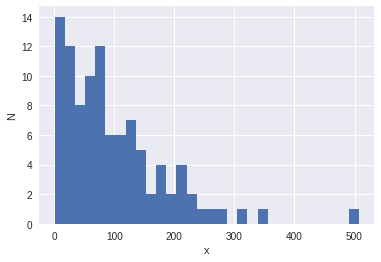

In [47]:
import numpy as np

md['exp'] = np.random.exponential(df, size=100)                          
# md now is a dictionary with one object: an array by the key 'exp'
pl.hist(md['exp'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

print ("Exponential mean: %.2f, standard deviation: %.2f"%(md['exp'].mean(), md['exp'].std()))

mysize = (1000 / (np.array(range(1, 100)))).astype(int)
print(mysize)

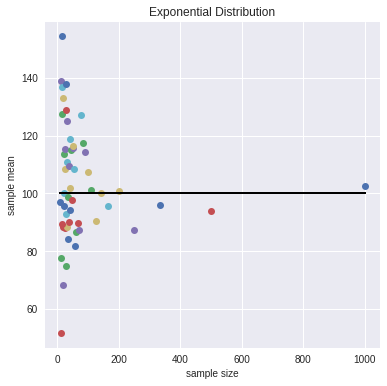

In [48]:
md['exp'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['exp'][n] = np.random.exponential(df, size = n)                   ##Probability is taken as 0.5
    
# save the means for plotting later    

md['exp']['means'] = {}
axbi_mu_n = pl.figure(figsize=(6,6)).add_subplot(111)

for nn in md['exp']:
    if not type(nn) == str:
        md['exp']['means'][nn] = md['exp'][nn].mean()
        #and plot it
        axbi_mu_n.plot(nn, md['exp']['means'][nn], 'o')
        axbi_mu_n.set_xlabel('sample size', fontsize=10)
        axbi_mu_n.set_ylabel('sample mean', fontsize=10)
        axbi_mu_n.set_title('Exponential Distribution', fontsize=12)
        axbi_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
        #axbi_mu_n.text(0,30,'As mean for binomial is np, choosing 0.5 probbaility will half the mean')

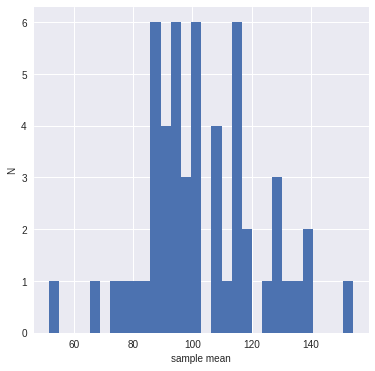

In [49]:
allmeans = list(md['exp']['means'].values())

pl.figure(figsize=(6, 6))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 10)
pl.ylabel('N', fontsize = 10)

## Mean of all distributions

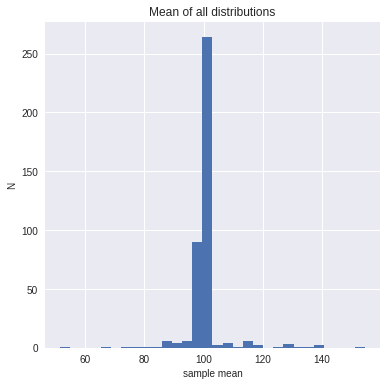

In [50]:
meandis=[]
distributions =['chisq','normal','poisson','binomial','exp']

for j in distributions:
    for i in list(md[j]['means'].values()):
        meandis.append(i)
        
pl.figure(figsize=(6, 6))
pl.hist(meandis,bins=30)
pl.xlabel('sample mean', fontsize = 10)
pl.ylabel('N', fontsize = 10)
pl.title('Mean of all distributions',fontsize=12)

### Extra Credit Assignment

<function matplotlib.pyplot.show>

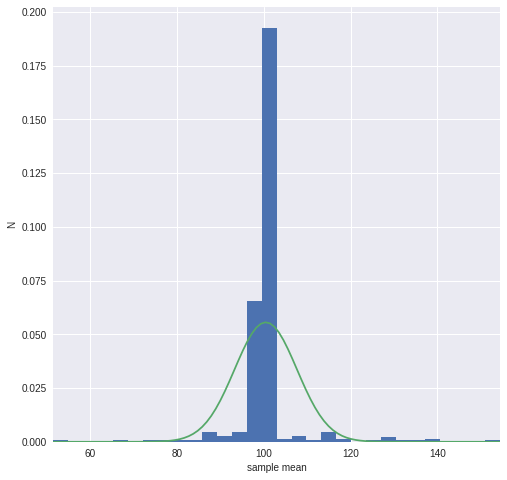

In [75]:
import pylab as pl
import numpy as np
import matplotlib.mlab as mlab


pl.figure(figsize = (8,8))
pl.hist(meandis, normed=True,bins=30)
pl.xlim((min(meandis), max(meandis)))
pl.xlabel('sample mean', fontsize = 10)
pl.ylabel('N', fontsize = 10)


mu = np.mean(meandis)
variance = np.var(meandis)
sigma = np.sqrt(variance)
x = np.linspace(min(meandis), max(meandis), 100)
pl.plot(x, mlab.normpdf(x, mu, sigma))
pl.show